In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Chemical_descriptors.csv")

In [6]:
df.tail()

,Unnamed: 0,#ID,name,reference,formula,charge,mass,InChI,InChIKey,SMILES,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,BiGG,Species_ID
50,826038,MNXM77,dihydroxyacetone phosphate,chebi:57642,C3H5O6P,-2.0,167.98347,"InChI=1S/C3H7O6P/c4-1-3(5)2-9-10(6,7)8/h4H,1-2...",InChIKey=GNGACRATGGDKBX-UHFFFAOYSA-L,O=C(CO)COP(=O)([O-])[O-],...,0,0,0,0,0,0,0,0,dhap,M_dhap_c
51,856684,MNXM8,NAD(+),chebi:57540,C21H26N7O14P2,-1.0,662.10185,InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17...,InChIKey=BAWFJGJZGIEFAR-NNYOXOHSSA-M,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,...,0,0,0,0,0,0,0,0,f6p,M_f6p_c
52,961123,MNXM89661,isocitrate(3-),chebi:16087,C6H5O7,-3.0,189.00517,InChI=1S/C6H8O7/c7-3(8)1-2(5(10)11)4(9)6(12)13...,InChIKey=ODBLHEXUDAPZAU-UHFFFAOYSA-K,O=C([O-])CC(C(=O)[O-])C(O)C(=O)[O-],...,0,0,0,0,0,0,0,0,icit,M_icit_c
53,964543,MNXM9,phosphate,chebi:43474,HO4P,-2.0,95.96234,"InChI=1S/H3O4P/c1-5(2,3)4/h(H3,1,2,3,4)/p-2",InChIKey=NBIIXXVUZAFLBC-UHFFFAOYSA-L,O=P([O-])([O-])O,...,0,0,0,0,0,0,0,0,pi,M_pi_c
54,1066989,WATER,H2O,mnx:WATER,H2O,0.0,18.01056,InChI=1S/H2O/h1H2,InChIKey=XLYOFNOQVPJJNP-UHFFFAOYSA-N,[H]O[H],...,0,0,0,0,0,0,0,0,h20,M_h2o_c


In [7]:
df.columns

Index(['Unnamed: 0', '#ID', 'name', 'reference', 'formula', 'charge', 'mass',
       'InChI', 'InChIKey', 'SMILES',
       ...
       'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole',
       'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'BiGG',
       'Species_ID'],
      dtype='object', length=220)

## For testing purposes: reading only the csv with RDKit numericals

In [8]:
df2 = pd.read_csv("chemical_properties.csv")
xx = df.loc[:, df2.columns].values

In [9]:
xx = StandardScaler().fit_transform(xx)

In [22]:
xx.shape

(55, 208)

In [23]:
np.mean(xx)

2.7173290812503834e-19

In [24]:
np.mean(xx), np.std(xx)

(2.7173290812503834e-19, 0.8492077756084468)

In [25]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]

In [26]:
normalized_descriptors = pd.DataFrame(xx, columns = feat_cols)

In [27]:
normalized_descriptors.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207
50,0.274190,-0.788322,0.274190,-0.046420,1.105405,-0.312463,-0.304509,-0.312384,-0.341493,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
51,1.045625,-0.975402,1.045625,-0.562720,-2.127937,1.722894,1.749879,1.723049,1.680505,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
52,0.288756,0.095961,0.288756,0.154111,1.059787,-0.225768,-0.213089,-0.225789,-0.184226,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
53,-0.208882,-0.813067,-0.208882,2.756306,0.223384,-0.609145,-0.599856,-0.609062,-0.656026,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
54,-3.144795,0.901265,-3.144795,-0.588883,0.074705,-0.930117,-0.942698,-0.930171,-0.925626,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0


In [28]:
normalized_descriptors.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207
0,-3.144795,0.901265,-3.144795,-0.588883,0.190500,-1.000135,-1.012155,-1.000213,-1.015492,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
1,-3.144795,0.901265,-3.144795,-0.588883,0.190500,-1.000135,-1.012155,-1.000213,-1.015492,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
2,1.053320,-0.973926,1.053320,-0.560454,-1.931218,1.727044,1.749879,1.727203,1.702972,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
3,0.248512,0.276816,0.248512,-0.495157,0.583200,-0.299935,-0.282546,-0.299980,-0.274093,0.0,...,-0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.194257,0.0
4,1.120455,-1.040375,1.120455,-0.586624,-2.160976,2.312133,2.336223,2.312091,2.219705,0.0,...,5.147815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.147815,0.0


In [39]:
pca_descriptors = PCA(n_components= 2)
principalComponents_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

In [41]:
pca_descriptors.

PCA(n_components=2)

In [18]:
principal_descriptors_df = pd.DataFrame(data= principalComponents_descriptors, columns= ["principal component 1", "principal comonent 2"])

(-5.0, 5.0)

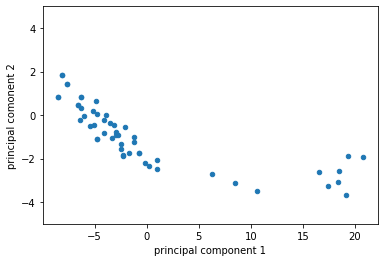

In [37]:
#principal_descriptors_df.tail()
ax  = principal_descriptors_df.plot.scatter(x = "principal component 1", y ="principal comonent 2")
ax.set_ylim(-5, 5)

In [20]:
print("Explained variation per principal comonent: {}".format(pca_descriptors.explained_variance_))

Explained variation per principal comonent: [70.8272724  25.24901201]


<Figure size 432x288 with 0 Axes>

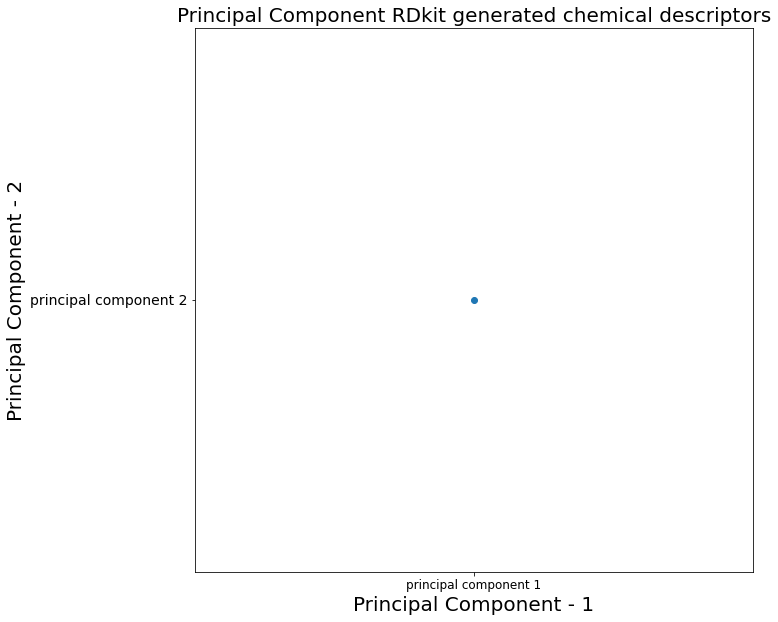

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component RDkit generated chemical descriptors",fontsize=20)

colors = ["r", "g"]
# target = # Something easy, like charge? inreplace = "positive" / "negative"
plt.scatter(x ="principal component 1", y = "principal component 2")
